https://analyticsindiamag.com/top-nlp-libraries-datasets-for-indian-languages/

https://lotus.kuee.kyoto-u.ac.jp/WAT/indic-multilingual/index.html

In [46]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

In [194]:
import os
import sys
sys.path.append('src')
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import datasets
from datasets import Dataset, DatasetDict
from datasets import load_from_disk, load_dataset

import pytorch_transformer as pt
%matplotlib inline

# Check Available Dataset Sizes

In [36]:
data_path = 'data/finalrepo/train'

In [38]:
!wc -l $data_path/*/en-hi/train.* | sort

    20106 data/finalrepo/train/alt/en-hi/train.en
    20106 data/finalrepo/train/alt/en-hi/train.hi
    46759 data/finalrepo/train/ted2020/en-hi/train.en
    46759 data/finalrepo/train/ted2020/en-hi/train.hi
    50349 data/finalrepo/train/pmi/en-hi/train.en
    50349 data/finalrepo/train/pmi/en-hi/train.hi
    62073 data/finalrepo/train/bibleuedin/en-hi/train.en
    62073 data/finalrepo/train/bibleuedin/en-hi/train.hi
    92319 data/finalrepo/train/opensubtitles/en-hi/train.en
    92319 data/finalrepo/train/opensubtitles/en-hi/train.hi
   187080 data/finalrepo/train/tanzil/en-hi/train.en
   187080 data/finalrepo/train/tanzil/en-hi/train.hi
   231459 data/finalrepo/train/wikimatrix/en-hi/train.en
   231459 data/finalrepo/train/wikimatrix/en-hi/train.hi
   266545 data/finalrepo/train/cvit-pib/en-hi/train.en
   266545 data/finalrepo/train/cvit-pib/en-hi/train.hi
   509594 data/finalrepo/train/jw/en-hi/train.en
   509594 data/finalrepo/train/jw/en-hi/train.hi
  1603080 data/finalrepo/train

# Choose a Dataset and Convert to HuggingFace Dataset object

Note we didn't choode iitb or jw because of bad quality

In [25]:
dataset = os.path.join(data_path,'cvit-pib/en-hi')
df = pd.DataFrame({'hi': [line.strip() for line in open(os.path.join(dataset,'train.hi'))], 
                   'en': [line.strip() for line in open(os.path.join(dataset,'train.en'))]})

In [47]:
idx = np.random.choice(len(df))
idx
df.iloc[idx].to_dict()

105881

{'hi': 'श्री राजनाथ सिंह ने मोबाइल डिवाइस टर्मिनलों से परिपूर्ण आपातकालीन प्रतिक्रिया वाहनों का भी ध्वजारोहण किया।',
 'en': 'Shri Rajnath Singh also flagged off Emergency Response Vehicles fitted with mobile device terminals.'}

In [48]:
df

,hi,en
0,प्रधानमंत्री कार्यालय इंडिया टुडे कॉनक्लेव में...,Prime Minister's Office English Rendering of P...
1,इंडिया टुडे कॉन्क्लेव से जुड़ने का मुझे पहले भ...,Earlier also I had opportunities to associate ...
2,मुझे बताया गया है कि कल इंडिया टुडे ग्रुप के ए...,I have been told that the Editor in Chief of I...
3,"दोस्तों, अनेक दशकों तक हम गलत नीतियों के साथ ग...",Friends for many decades we have been going in...
4,सब कुछ सरकार करेगी यह भाव प्रबल हो गया।,The idea that the Government will do everythin...
...,...,...
266540,एआरआईआईए मूल्यांकन समिति के चेयरमैन श्री बीवीआ...,"As per BVR Mohan Reddy, Chairman, ARIIA evalua..."
266541,एआरआईआईएएक रूपरेखा है जो हमारी शिक्षा प्रणाली ...,ARIIA is a framework that measures this change...
266542,मानव संसाधन विकास मंत्रालयके नवाचार प्रकोष्ठ क...,"Abhay Jere, Chief Innovation Officer, MHRDs In..."
266543,"एआरआईआईएरैंकिंग, निश्चित रूप से भारतीय संस्थान...",ARIIA ranking will certainly inspire Indian in...


In [148]:
df_train, df_test = train_test_split(df,test_size = 3000)
df_test, df_validation = train_test_split(df_test,test_size = 300)

In [149]:
df_train.shape
df_validation.shape
df_test.shape

(263545, 2)

(300, 2)

(2700, 2)

In [172]:
train_ds = Dataset.from_dict({'translation':list(df_train.T.to_dict().values())})
validation_ds = Dataset.from_dict({'translation':list(df_validation.T.to_dict().values())})
test_ds = Dataset.from_dict({'translation':list(df_test.T.to_dict().values())})


ds = DatasetDict()

ds['train'] = train_ds
ds['validation'] = validation_ds
ds['test'] = test_ds

print(ds)

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 263545
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 300
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2700
    })
})


In [173]:
ds.save_to_disk("data/cvit-pib.hf")

Saving the dataset (0/1 shards):   0%|          | 0/263545 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/300 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/2700 [00:00<?, ? examples/s]

In [174]:
_ds = load_from_disk("data/cvit-pib.hf")

_ds

DatasetDict({
    train: Dataset({
        features: ['translation'],
        num_rows: 263545
    })
    validation: Dataset({
        features: ['translation'],
        num_rows: 300
    })
    test: Dataset({
        features: ['translation'],
        num_rows: 2700
    })
})

# EDA

In [176]:
data_params = { 'dataset_path' : ['local',["data/cvit-pib.hf"]],
                'tokenizers':{'path_hi':'monsoon-nlp/hindi-bert', 'path_en':'bert-base-uncased'},
                'lang' : ('hi','en') #(from-language, to-language)
              }

In [177]:
if data_params['dataset_path'][0] == "local":
    dataset = load_from_disk(*data_params['dataset_path'][1])
else:
    dataset = load_dataset(*data_params['dataset_path'][1])

In [178]:
hi_tokenizer, en_tokenizer = pt.tokenizer.load_tokenizers(**data_params['tokenizers'])

In [179]:
df = pt.dataset._explore_dataset(dataset['train'], (hi_tokenizer, 'hi'), (en_tokenizer,'en'), csv_len = None)

  0%|          | 0/263545 [00:00<?, ?it/s]

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [181]:
df

,hi,en,hi_en,index
230288,1219,512,1731,230288
162386,1089,512,1601,162386
95162,916,512,1428,95162
252095,770,512,1282,252095
214960,754,512,1266,214960
...,...,...,...,...
88551,4,3,7,88551
122920,4,3,7,122920
141737,3,3,6,141737
237821,3,3,6,237821


In [182]:
df['hi_en'] = df.hi + df.en

df = df[['hi','en','hi_en']].astype(int)

In [184]:
df = df.sort_values('hi_en', axis=0, ascending=False)
df['index'] = df.index
df.to_csv('tmp.csv',index=False)

In [193]:
for i in df[df['hi']<5].index:
    dataset['train'][i]

{'translation': {'en': 'Piyush Goyal', 'hi': 'पीयूष गोयल'}}

{'translation': {'en': 'Background:- AKT', 'hi': 'पृष्ठभूमिः'}}

{'translation': {'en': 'B.S.', 'hi': 'बीएस.'}}

{'translation': {'en': 'Will you do it', 'hi': 'करोगे?'}}

{'translation': {'en': 'Om Shanti.', 'hi': 'ओम शांति'}}

{'translation': {'en': 'Namaskaar.', 'hi': 'नमस्कार।'}}

{'translation': {'en': 'Ministry of Home Affairs', 'hi': 'गृह मंत्रालय'}}

{'translation': {'en': 'Source:  SD', 'hi': 'स्रोत:'}}

{'translation': {'en': '2002 crore.', 'hi': 'है ।'}}

{'translation': {'en': '28 Nil', 'hi': '28 शून्य'}}

{'translation': {'en': 'Gen.', 'hi': 'ले.'}}

{'translation': {'en': 'Major Impact', 'hi': 'प्रमुख प्रभाव'}}

{'translation': {'en': 'How many', 'hi': 'कितने?'}}

{'translation': {'en': 'C.', 'hi': 'सी.'}}

{'translation': {'en': 'c.', 'hi': 'ग.'}}

{'translation': {'en': 'C.', 'hi': 'ग.'}}

{'translation': {'en': 'Nil', 'hi': 'कुछ नहीं'}}

{'translation': {'en': 'Md.', 'hi': 'मो.'}}

{'translation': {'en': '19.', 'hi': 'डी.'}}

{'translation': {'en': 'g.', 'hi': 'छ.'}}

{'translation': {'en': 'D.', 'hi': 'डी.'}}

{'translation': {'en': 'NO.', 'hi': 'नहीं।'}}

{'translation': {'en': 'Y.', 'hi': 'वाई.'}}

{'translation': {'en': 'd.', 'hi': 'घ.'}}

{'translation': {'en': 'Jammu  Kashmir', 'hi': 'जम्मू  कश्मीर'}}

{'translation': {'en': 'Friends.', 'hi': 'दोस्तों।'}}

{'translation': {'en': 'Implementation:', 'hi': 'कार्यान्वयन:'}}

{'translation': {'en': 'Background AKT', 'hi': 'पृष्ठभूमि'}}

{'translation': {'en': 'Prosperity.', 'hi': 'समृद्धि।'}}

{'translation': {'en': 'Gazette Notification', 'hi': 'गजट अधिसूचना'}}

{'translation': {'en': 'd.', 'hi': 'डी.'}}

{'translation': {'en': 'Prof.', 'hi': 'प्रो.'}}

{'translation': {'en': 'Good Evening', 'hi': 'शुभ संध्या'}}

{'translation': {'en': 'Links:', 'hi': 'लिंक्स:'}}

{'translation': {'en': 'I.', 'hi': 'आई.'}}

{'translation': {'en': 'e.', 'hi': 'च.'}}

{'translation': {'en': 'Dream', 'hi': 'सपने देखो'}}

{'translation': {'en': 'Background  AP', 'hi': 'पृष्ठभूमि'}}

{'translation': {'en': 'MV', 'hi': 'एबी-'}}

{'translation': {'en': 'Sure', 'hi': 'पक्का।'}}

{'translation': {'en': 'Om', 'hi': 'ओम'}}

{'translation': {'en': 'Great', 'hi': 'वाह'}}

{'translation': {'en': 'SS', 'hi': 'पृष्ठभूमि'}}

In [220]:
maxlen=84
df[(df.hi<maxlen//2) & (df.en<maxlen//2)]

,hi,en,hi_en,index
134208,41,41,82,134208
194926,41,41,82,194926
248040,41,41,82,248040
127833,41,41,82,127833
119498,41,41,82,119498
...,...,...,...,...
88551,4,3,7,88551
122920,4,3,7,122920
141737,3,3,6,141737
237821,3,3,6,237821


(array([2.60533e+05, 2.77100e+03, 1.88000e+02, 3.40000e+01, 9.00000e+00,
        5.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00]),
 array([   3. ,  124.6,  246.2,  367.8,  489.4,  611. ,  732.6,  854.2,
         975.8, 1097.4, 1219. ]),
 <BarContainer object of 10 artists>)

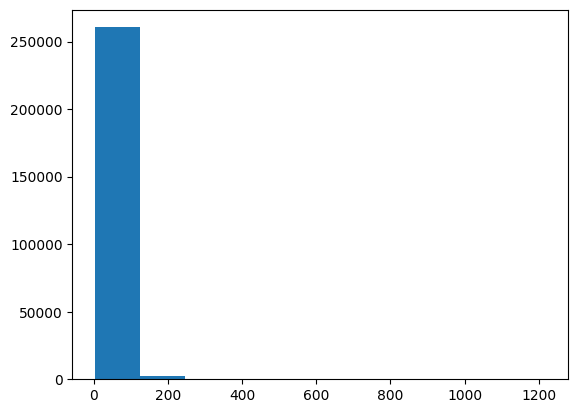

In [201]:
plt.hist(df.hi)

In [199]:
dataset['train'][230288]

{'translation': {'en': 'The State wise potential, that is eligible population that can be covered under APY, and gender wise distribution of population as on 27th Oct 2018 is given below: S.No STATE POPULATION BETWEEN AGE GROUP 18 TO 40 Number of APY Subscribers as on 27.10.2016 Percentage of Population Covered under APY Total Female Subscribers Percentage of Female Subscribers Total Male Subscibers Percentage of Male Subscribers Total Transgender Subscribers Percentage of Transgender Subscribers Total 1 ANDAMAN  NICOBAR ISLANDS 168,753 1,856 1 715 39 1,141 61 0 0 1,856 2 ANDHRA PRADESH  TELANGANA 34,832,527 1,128,032 3 565,804 50 561,843 50 385 0 1,128,032 3 ARUNACHAL PRADESH 542,212 4,507 1 1,936 43 2,571 57 0 0 4,507 4 ASSAM 12,291,862 250,783 2 109,481 44 141,259 56 43 0 250,783 5 BIHAR 35,484,731 1,116,119 3 559,297 50 556,707 50 115 0 1,116,119 6 CHANDIGARH 473,489 19,408 4 6,383 33 13,023 67 2 0 19,408 7 CHHATTISGARH 9,675,449 194,442 2 77,620 40 116,810 60 12 0 194,442 8 DADRA 